In [222]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate
from numpy.lib.polynomial import poly1d
from scipy.sparse import diags

In [223]:
def f(x):
    return np.abs(np.sin(x)) - np.abs(np.cos(x))

In [224]:
def x_cheb_m(m):
    return 0.5 * ((b - a) * np.cos((2*m + 1) / (2*n) * np.pi) + a + b)

In [225]:
def lagrange(x, y):
    M = len(x)
    p = poly1d(0.0)
    for j in range(M):
        pt = poly1d(y[j])
        for k in range(M):
            if k == j:
                continue
            fac = x[j]-x[k]
            pt *= poly1d([1.0, -x[k]])/fac
        p += pt
    return p

In [226]:
def cubic_spline(xi, yi, x0):
    n = len(xi)
    hsp = xi[1:] - xi[:-1]
    Bdop = (yi[1:] - yi[:-1]) / hsp
    beta = 2 * (hsp[:-1] + hsp[1:])

    T = diags([hsp[:-1], beta, hsp[1:]], [-1, 0, 1], shape=(n-2, n-2))

    Cdop = np.zeros(n)
    Cdop[1:-1] = np.linalg.solve(T.todense(), 6 * (Bdop[1:] - Bdop[:-1]))

    a = yi[:-1]
    b = Bdop - hsp * (2 * Cdop[:-1] + Cdop[1:]) / 6
    c = Cdop / 2
    d = (Cdop[1:] - Cdop[:-1]) / (6 * hsp)
    
    ysp = np.zeros_like(x0)
    for i in range(n-1):
        mask = (x0 >= xi[i]) & (x0 <= xi[i+1])
        ysp[mask] = a[i] + b[i] * (x0[mask] - xi[i]) + c[i] * (x0[mask] - xi[i])**2 + d[i] * (x0[mask] - xi[i])**3
    
    return ysp, a, b, c, d

In [227]:
a = 0
b = np.pi
n = 6
idx = 43 % n
h = (b - a) / n
x_ = np.linspace(a, b, 100)
y_ = f(x_)
print(f'idx: {idx}')

idx: 1


In [228]:
print(f'x = {np.round(x := np.linspace(a, b, n+1), 3)}')
print(f'x intermediate = {np.round(x_interm := np.linspace(a + 0.75*h, b-h*0.25, n), 3)}')
print(f'x chebyshev = {np.round(x_cheb := np.array([x_cheb_m(m) for m in range(n)])[::-1], 3)}')
print(f'y = {np.round(y := f(x), 3)}')
print(f'y intermediate = {np.round(y_interm := f(x_interm), 3)}')
print(f'y chebyshev = {np.round(y_cheb := f(x_cheb), 3)}')

x = [0.    0.524 1.047 1.571 2.094 2.618 3.142]
x intermediate = [0.393 0.916 1.44  1.963 2.487 3.011]
x chebyshev = [0.054 0.46  1.164 1.977 2.682 3.088]
y = [-1.    -0.366  0.366  1.     0.366 -0.366 -1.   ]
y intermediate = [-0.541  0.185  0.861  0.541 -0.185 -0.861]
y chebyshev = [-0.945 -0.452  0.523  0.523 -0.452 -0.945]


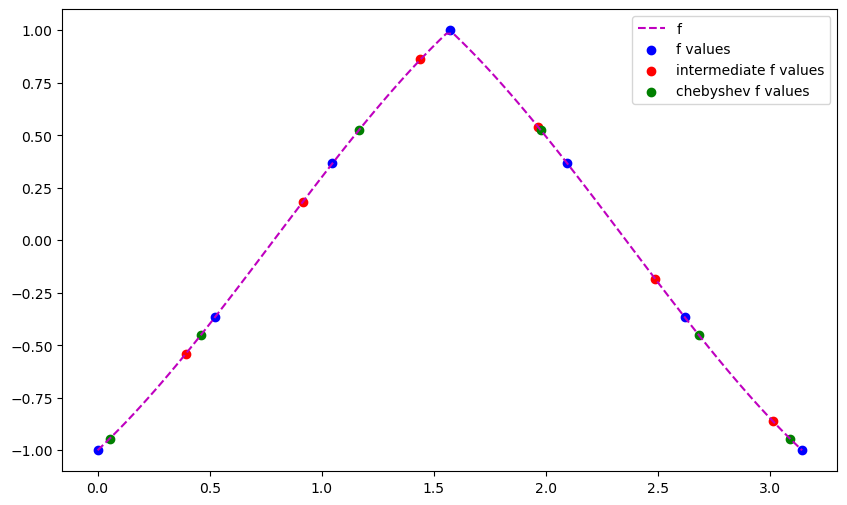

In [229]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.scatter(x, y, color='b', label='f values');
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values');
plt.scatter(x_cheb, y_cheb, color='g', label='chebyshev f values');
plt.legend();

In [230]:
cs = interpolate.CubicSpline(x, y)
y_interm_cs = cs(x_interm)
y_interm_cs - y_interm

array([ 0.01721592, -0.02440078,  0.08052975,  0.04540869, -0.01734896,
        0.0238446 ])

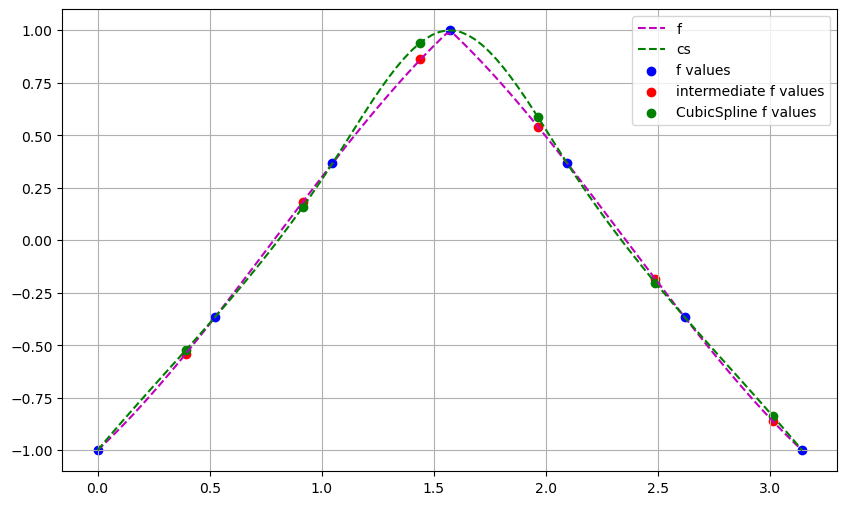

In [231]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_, cs(x_), '--', color='g', label='cs')
plt.scatter(x, y, color='b', label='f values')
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values')
plt.scatter(x_interm, y_interm_cs, color='g', label='CubicSpline f values')
plt.grid()
plt.legend();

In [232]:
cs = interpolate.CubicSpline(x_cheb, y_cheb)
y_interm_cs = cs(x_interm)
y_interm_cs - y_interm

array([-0.00870429,  0.04762464, -0.16794307, -0.00545132,  0.02918683,
       -0.01312907])

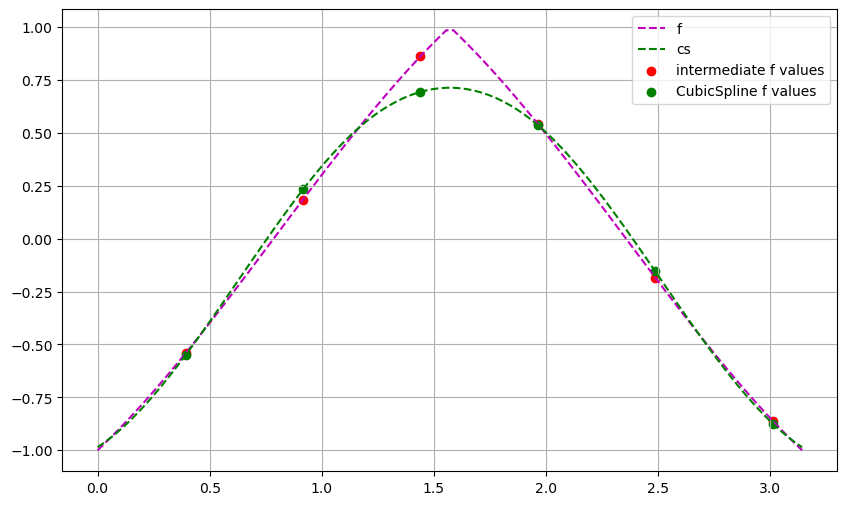

In [233]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_, cs(x_), '--', color='g', label='cs')
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values')
plt.scatter(x_interm, y_interm_cs, color='g', label='CubicSpline f values')
plt.grid()
plt.legend();

In [234]:
lp = interpolate.lagrange(x, y)
y_interm_lp = lp(x_interm)
y_interm_lp - y_interm

array([ 0.13558098, -0.06977496,  0.09162215,  0.07041549, -0.08666941,
        0.27747119])

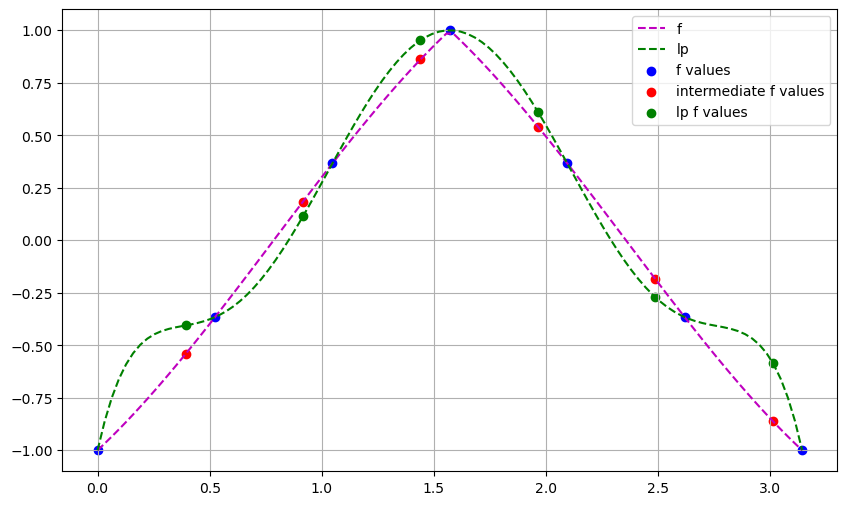

In [235]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_, lp(x_), '--', color='g', label='lp')
plt.scatter(x, y, color='b', label='f values')
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values')
plt.scatter(x_interm, y_interm_lp, color='g', label='lp f values')
plt.grid()
plt.legend();

In [236]:
lp = interpolate.lagrange(x_cheb, y_cheb)
y_interm_lp = lp(x_interm)
y_interm_lp - y_interm

array([-0.01173843,  0.05363112, -0.16462038, -0.00552341,  0.03614433,
       -0.01911294])

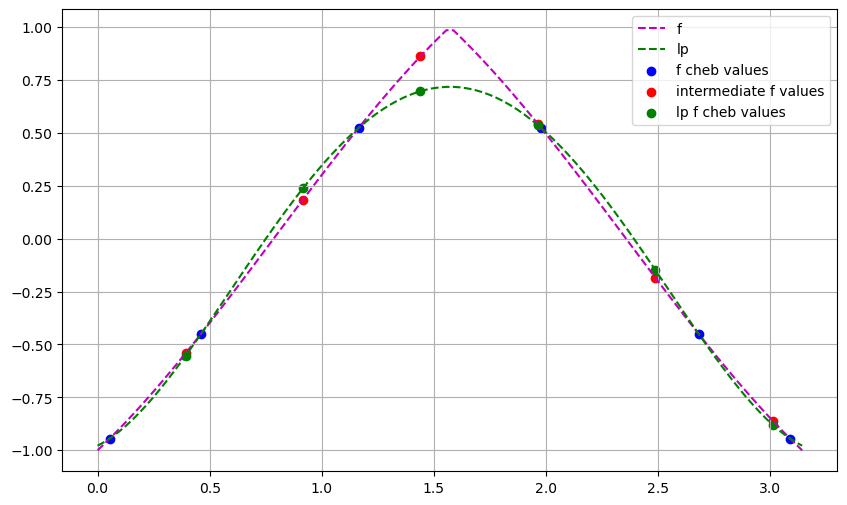

In [237]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_, lp(x_), '--', color='g', label='lp')
plt.scatter(x_cheb, y_cheb, color='b', label='f cheb values')
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values')
plt.scatter(x_interm, y_interm_lp, color='g', label='lp f cheb values')
plt.grid()
plt.legend();

In [238]:
print(f'intemediate point {idx} value: {y_interm[idx]}\n\n')

interval1 = slice(1,idx+2)
lp1 = lagrange(x[interval1], y[interval1])
y_interm_lp1 = lp1(x_interm[idx])
print(f'1 degree polinom \n{lp1}')
print(f'value in intemediate point {idx}, y = {y_interm_lp1}')

interval2 = slice(0,idx+2)
lp2 = lagrange(x[interval2], y[interval2])
y_interm_lp2 = lp2(x_interm[idx])
print(f'2 degree polinom\n{lp2}')
print(f'value in intemediate point {idx}, y = {y_interm_lp2}')

interval3 = slice(0,idx+3)
lp3 = lagrange(x[interval3], y[interval3])
y_interm_lp3 = lp1(x_interm[idx])
print(f'3 degree polinom\n{lp3}')
print(f'value in intemediate point {idx}, y = {y_interm_lp3}')

interval4 = slice(0, -1)
lpf = lagrange(x[interval4], y[interval4])
y_interm_lpf = lpf(x_interm[idx])
print(f'n-1 degree polinom\n{lpf}')
print(f'value in intemediate point {idx}, y = {y_interm_lpf}')

intemediate point 1 value: 0.1845919112825145


1 degree polinom 
 
1.398 x - 1.098
value in intemediate point 1, y = 0.1830127018922194
2 degree polinom
        2
0.1789 x + 1.117 x - 1
value in intemediate point 1, y = 0.17381805707784603
3 degree polinom
         3          2
-0.2277 x + 0.5366 x + 0.9923 x - 1
value in intemediate point 1, y = 0.1830127018922194
n-1 degree polinom
        5         4         3         2
0.7016 x - 4.214 x + 8.201 x - 6.127 x + 2.723 x - 1
value in intemediate point 1, y = 0.1424224291978915


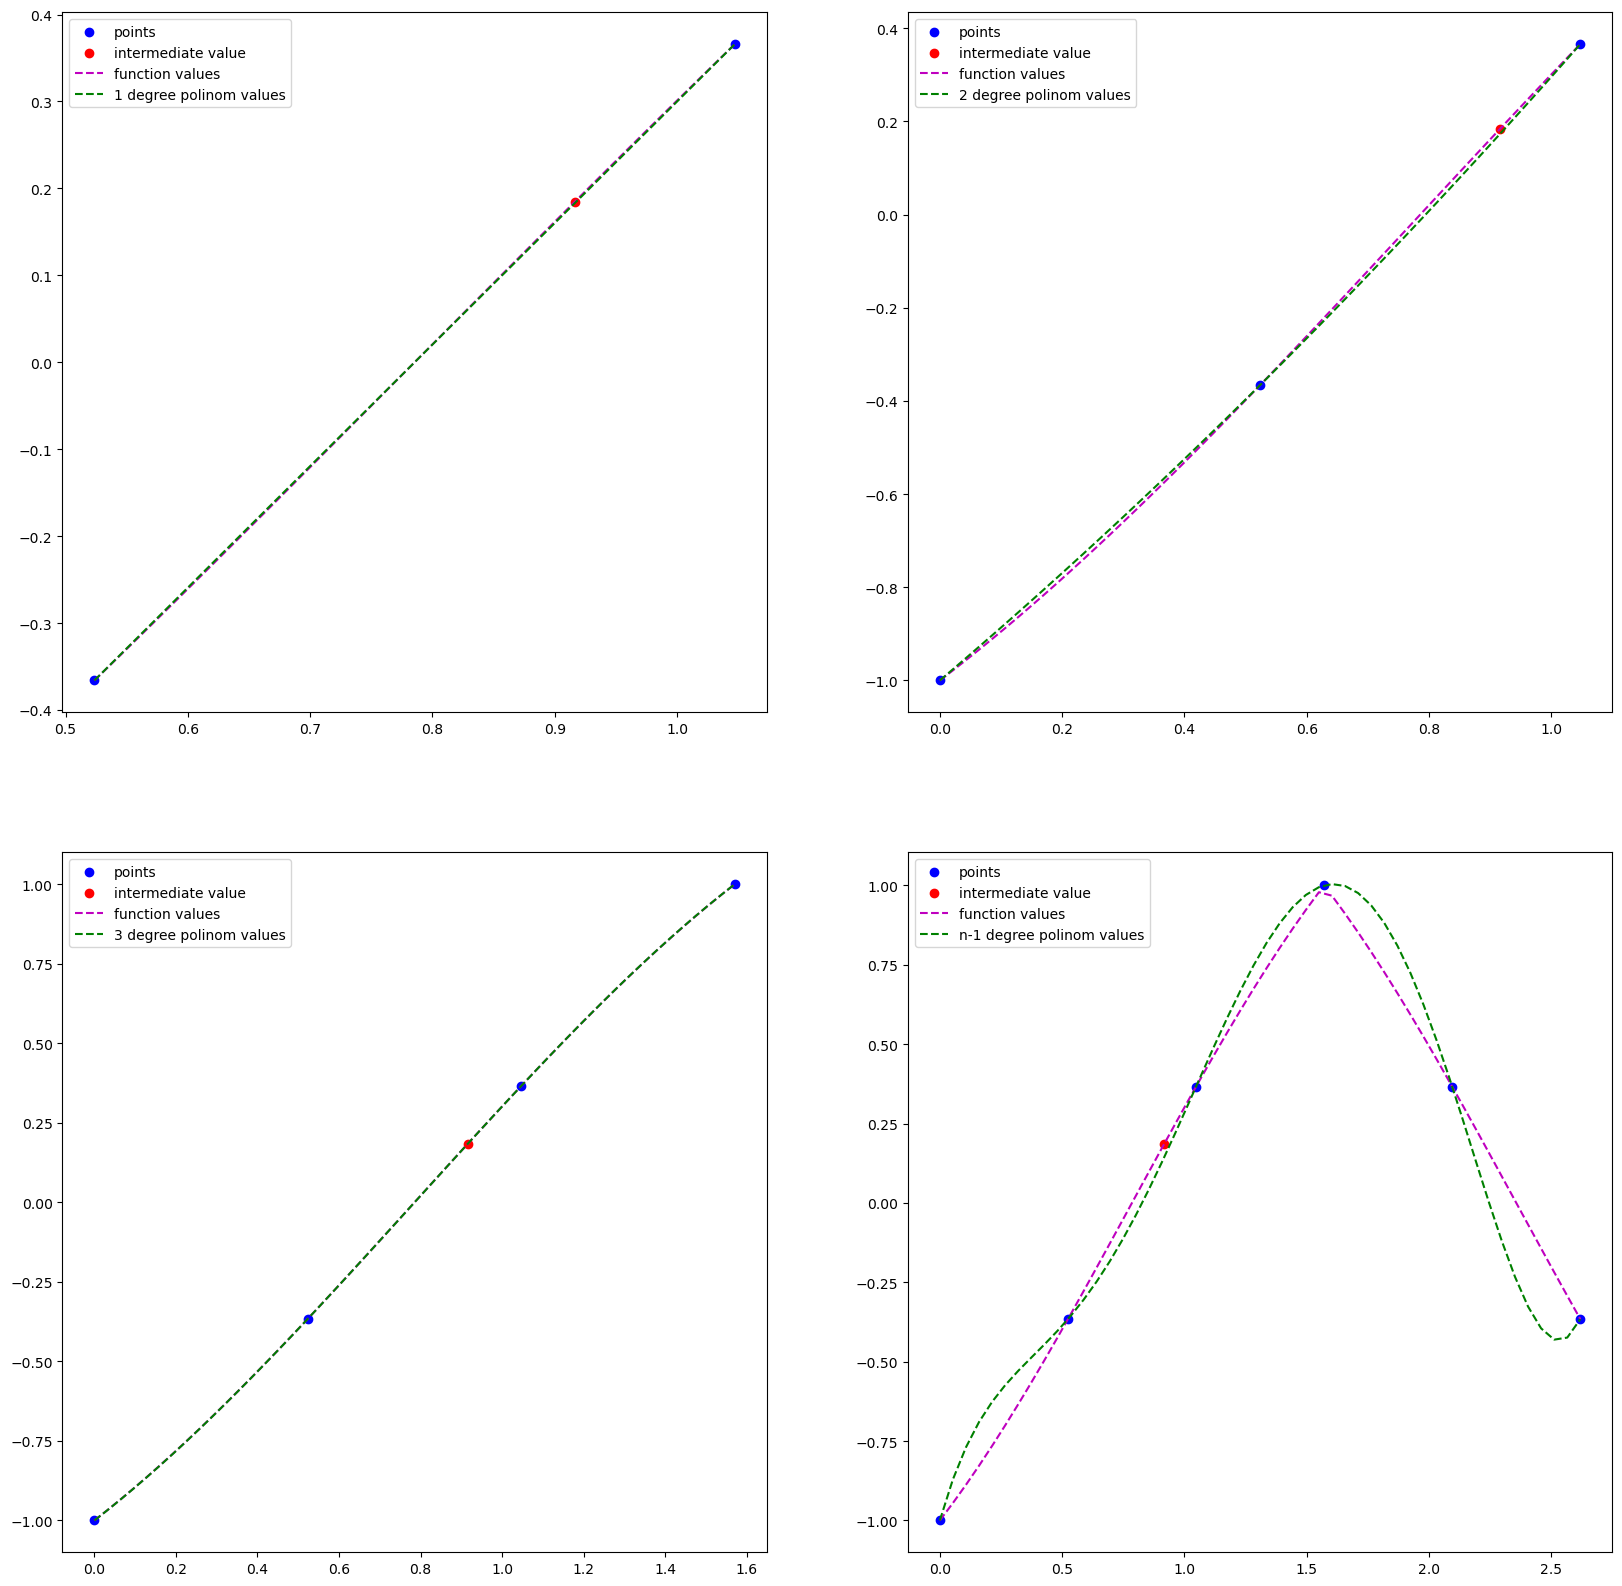

In [239]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axs[0, 0].scatter(x[interval1], y[interval1], color='b', label='points')
axs[0, 0].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[0, 0].plot(x_t:=np.linspace(x[1], x[idx+1]), f(x_t), '--', color='m', label='function values')
axs[0, 0].plot(x_t, lp1(x_t), '--', color='g', label='1 degree polinom values')
axs[0, 0].legend();

axs[0, 1].scatter(x[interval2], y[interval2], color='b', label='points')
axs[0, 1].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[0, 1].plot(x_t:=np.linspace(x[0], x[idx+1]), f(x_t), '--', color='m', label='function values')
axs[0, 1].plot(x_t, lp2(x_t), '--', color='g', label='2 degree polinom values')
axs[0, 1].legend();

axs[1, 0].scatter(x[interval3], y[interval3], color='b', label='points')
axs[1, 0].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[1, 0].plot(x_t:=np.linspace(x[0], x[idx+2]), f(x_t), '--', color='m', label='function values')
axs[1, 0].plot(x_t, lp3(x_t), '--', color='g', label='3 degree polinom values')
axs[1, 0].legend();

axs[1, 1].scatter(x[interval4], y[interval4], color='b', label='points')
axs[1, 1].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[1, 1].plot(x_t:=np.linspace(x[0], x[-2]), f(x_t), '--', color='m', label='function values')
axs[1, 1].plot(x_t, lpf(x_t), '--', color='g', label='n-1 degree polinom values')
axs[1, 1].legend();

In [240]:
print(f'intemediate point {idx} value: {y_interm[idx]}\n\n')

lp1 = lagrange(x_cheb[interval1], y_cheb[interval1])
y_interm_lp1 = lp1(x_interm[idx])
print(f'1 degree polinom \n{lp1}')
print(f'value in intemediate point {idx}, y = {y_interm_lp1}')

lp2 = lagrange(x_cheb[interval2], y_cheb[interval2])
y_interm_lp2 = lp2(x_interm[idx])
print(f'2 degree polinom\n{lp2}')
print(f'value in intemediate point {idx}, y = {y_interm_lp2}')

lp3 = lagrange(x_cheb[interval3], y_cheb[interval3])
y_interm_lp3 = lp1(x_interm[idx])
print(f'3 degree polinom\n{lp3}')
print(f'value in intemediate point {idx}, y = {y_interm_lp3}')

lpf = lagrange(x_cheb, y_cheb)
y_interm_lpf = lpf(x_interm[idx])
print(f'n-1 degree polinom\n{lpf}')
print(f'value in intemediate point {idx}, y = {y_interm_lpf}')

intemediate point 1 value: 0.1845919112825145


1 degree polinom 
 
1.385 x - 1.089
value in intemediate point 1, y = 0.1797186038234122
2 degree polinom
        2
0.1547 x + 1.133 x - 1.006
value in intemediate point 1, y = 0.16221406717372733
3 degree polinom
         3         2
-0.5548 x + 1.086 x + 0.7879 x - 0.9903
value in intemediate point 1, y = 0.1797186038234122
n-1 degree polinom
           5          4         3         2
2.776e-17 x + 0.2111 x - 1.326 x + 1.917 x + 0.522 x - 0.9783
value in intemediate point 1, y = 0.23822303378489118


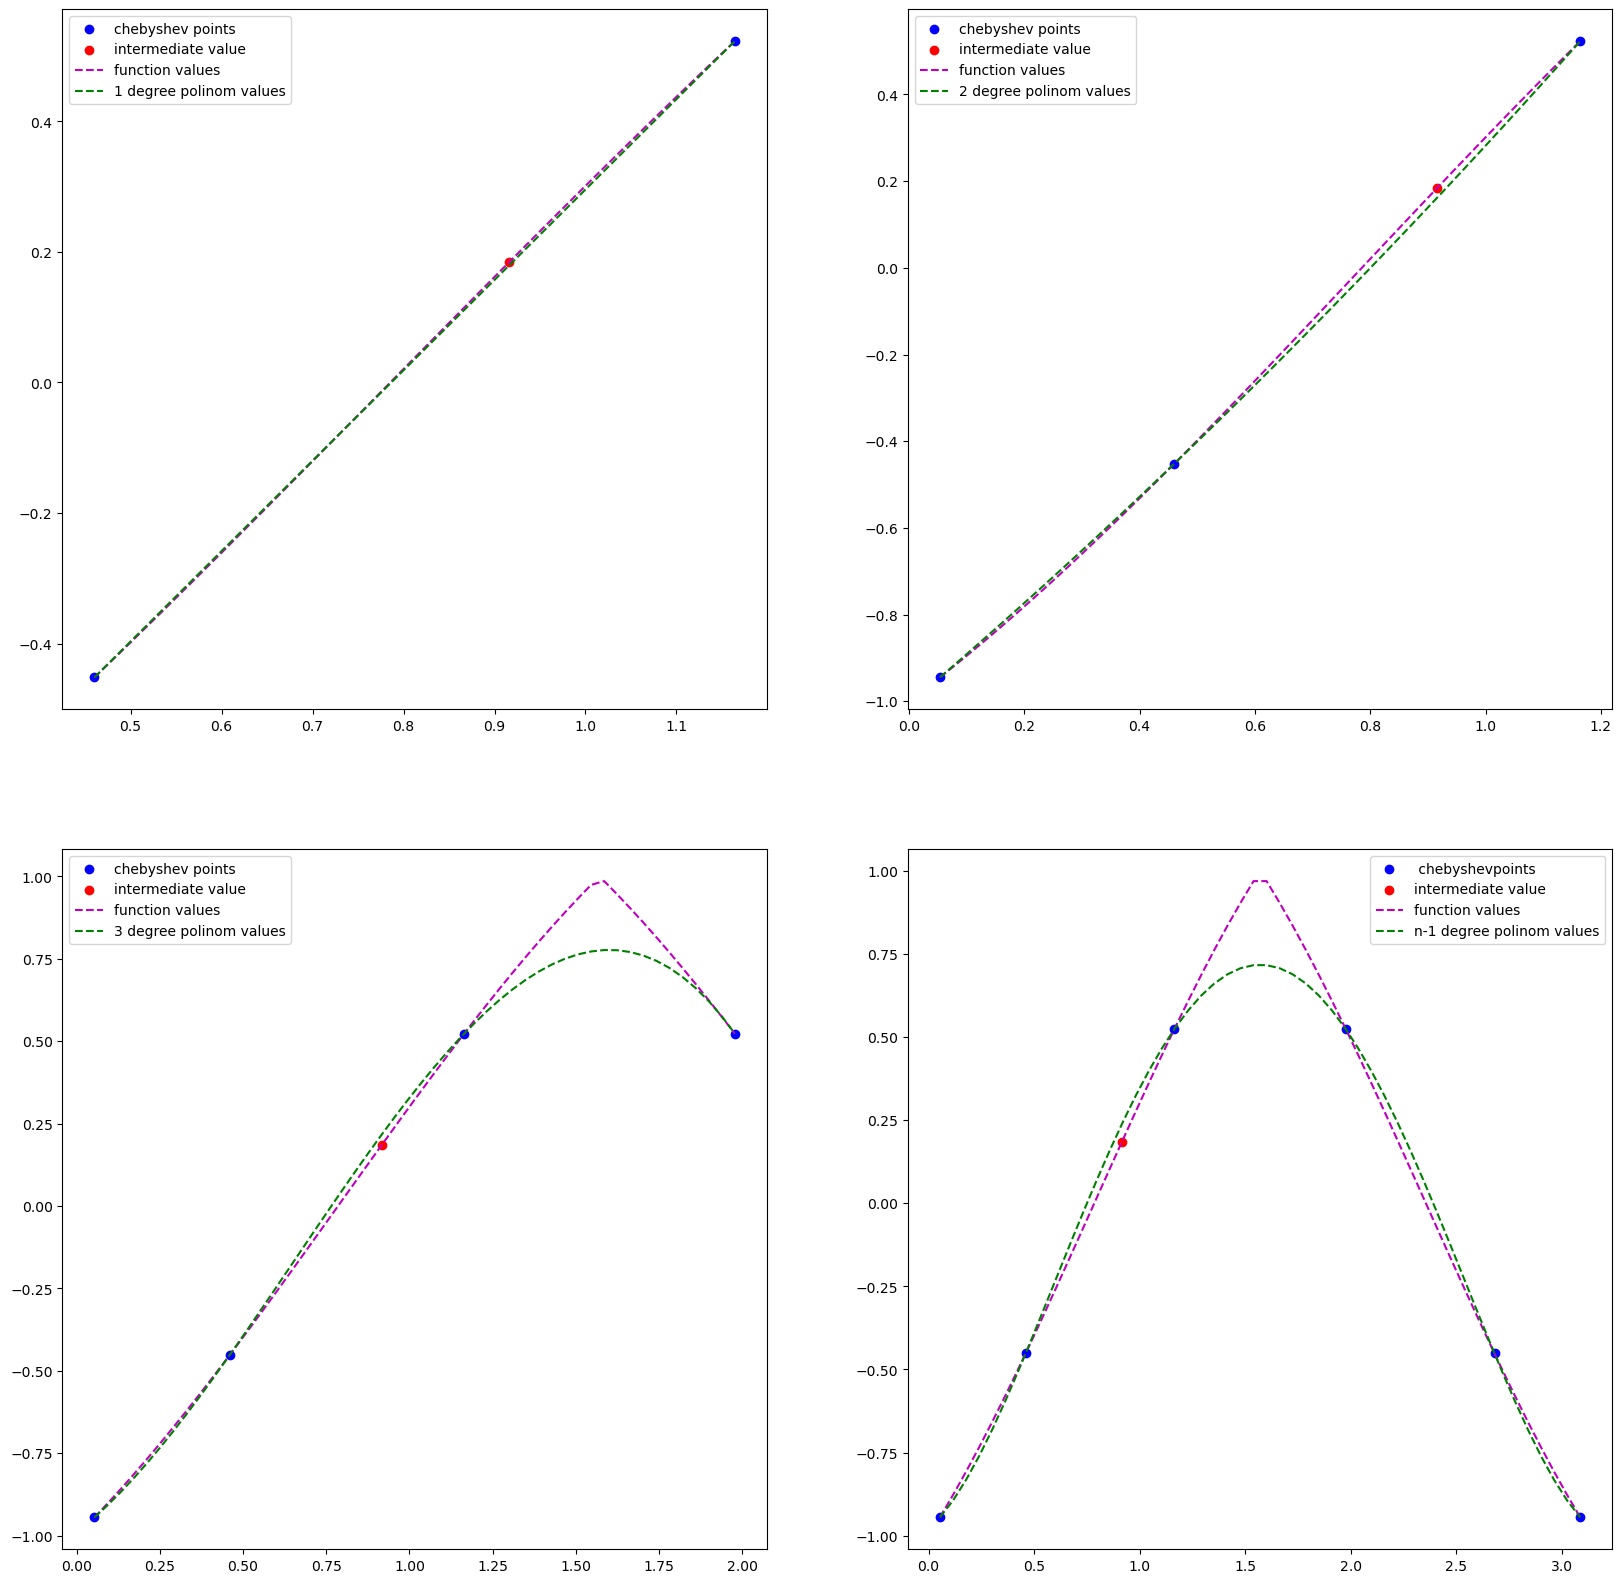

In [241]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axs[0, 0].scatter(x_cheb[interval1], y_cheb[interval1], color='b', label='chebyshev points')
axs[0, 0].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[0, 0].plot(x_t:=np.linspace(x_cheb[1], x_cheb[idx+1]), f(x_t), '--', color='m', label='function values')
axs[0, 0].plot(x_t, lp1(x_t), '--', color='g', label='1 degree polinom values')
axs[0, 0].legend();

axs[0, 1].scatter(x_cheb[interval2], y_cheb[interval2], color='b', label='chebyshev points')
axs[0, 1].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[0, 1].plot(x_t:=np.linspace(x_cheb[0], x_cheb[idx+1]), f(x_t), '--', color='m', label='function values')
axs[0, 1].plot(x_t, lp2(x_t), '--', color='g', label='2 degree polinom values')
axs[0, 1].legend();

axs[1, 0].scatter(x_cheb[interval3], y_cheb[interval3], color='b', label='chebyshev points')
axs[1, 0].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[1, 0].plot(x_t:=np.linspace(x_cheb[0], x_cheb[idx+2]), f(x_t), '--', color='m', label='function values')
axs[1, 0].plot(x_t, lp3(x_t), '--', color='g', label='3 degree polinom values')
axs[1, 0].legend();

axs[1, 1].scatter(x_cheb, y_cheb, color='b', label=' chebyshevpoints')
axs[1, 1].scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
axs[1, 1].plot(x_t:=np.linspace(x_cheb[0], x_cheb[-1]), f(x_t), '--', color='m', label='function values')
axs[1, 1].plot(x_t, lpf(x_t), '--', color='g', label='n-1 degree polinom values')
axs[1, 1].legend();

In [242]:
params = ['a', 'b', 'c', 'd']
y_interm_cs, *coefs = cubic_spline(x, y, x_interm)
print(f'intemediate point {idx} value: {y_interm[idx]}\n')
print(f'y value in point {idx}: {y_interm_cs[idx]}\n')
for param, coef in zip(params, coefs): print(f'param: {param}, coef: {np.round(coef, 3)}')

intemediate point 1 value: 0.1845919112825145

y value in point 1: 0.16114459414740262

param: a, coef: [-1.    -0.366  0.366  1.     0.366 -0.366]
param: b, coef: [ 1.193  1.247  1.645  0.    -1.645 -1.247]
param: c, coef: [ 0.     0.105  0.655 -3.796  0.655  0.105  0.   ]
param: d, coef: [ 0.067  0.35  -2.833  2.833 -0.35  -0.067]


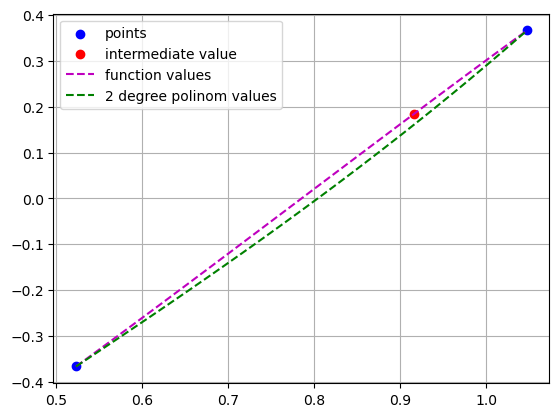

In [243]:
interval1 = slice(1, idx+2)
plt.scatter(x[interval1], y[interval1], color='b', label='points')
plt.scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
plt.plot(x_t:=np.linspace(x[1], x[idx+1]), f(x_t), '--', color='m', label='function values')
plt.plot(x_t, cubic_spline(x, y, x_t)[0], '--', color='g', label='Cubic spline values')
plt.grid()
plt.legend();

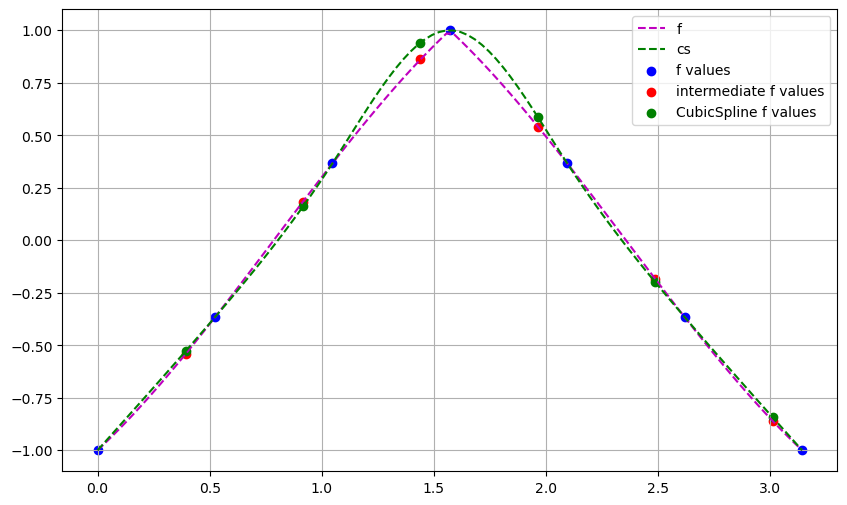

In [244]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_, cubic_spline(x, y, x_)[0], '--', color='g', label='cs')
plt.scatter(x, y, color='b', label='f values')
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values')
plt.scatter(x_interm, y_interm_cs, color='g', label='Cubic spline f values')
plt.grid()
plt.legend();

In [245]:
y_interm_cs_cheb, *coefs = cubic_spline(x_cheb, y_cheb, x_interm)
print(f'intemediate point {idx} value: {y_interm[idx]}\n')
print(f'y value in point {idx}: {y_interm_cs_cheb[idx]}\n')
for param, coef in zip(params, coefs): print(f'param: {param}, coef: {np.round(coef, 3)}')

intemediate point 1 value: 0.1845919112825145

y value in point 1: 0.21870756908265113

param: a, coef: [-0.945 -0.452  0.523  0.523 -0.452]
param: b, coef: [ 1.134  1.371  0.945 -0.95  -1.402]
param: c, coef: [ 0.     0.583 -1.105 -1.275  0.699  0.   ]
param: d, coef: [ 0.478 -0.799 -0.069  0.934 -0.573]


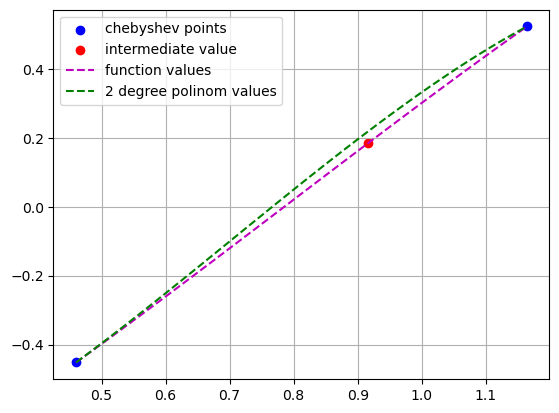

In [246]:
plt.scatter(x_cheb[interval1], y_cheb[interval1], color='b', label='chebyshev points')
plt.scatter(x_interm[idx], y_interm[idx], color='r', label='intermediate value')
plt.plot(x_t:=np.linspace(x_cheb[1], x_cheb[idx+1]), f(x_t), '--', color='m', label='function values')
plt.plot(x_t, cubic_spline(x_cheb, y_cheb, x_t)[0], '--', color='g', label='Cubic spline values')
plt.grid()
plt.legend();

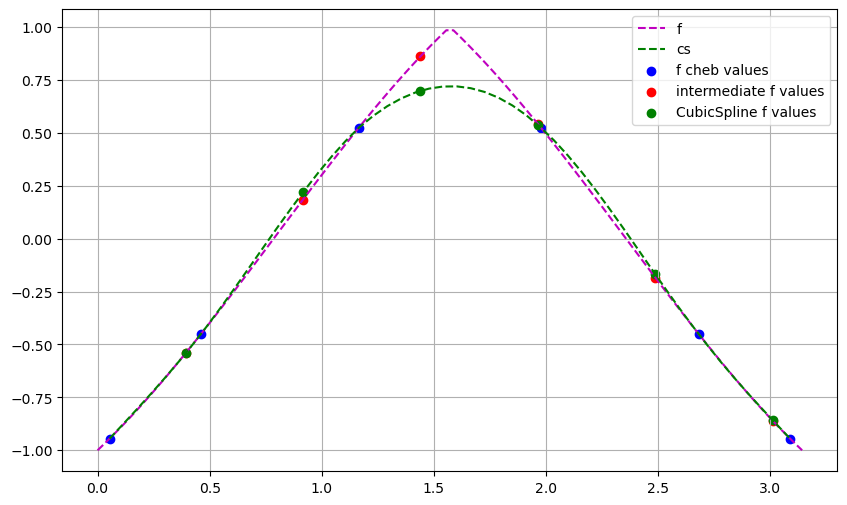

In [247]:
plt.figure(figsize=(10, 6))
plt.plot(x_, y_, '--', color='m', label='f')
plt.plot(x_t:=np.linspace(x_cheb[0], x_cheb[-1]), cubic_spline(x_cheb, y_cheb, x_t)[0], '--', color='g', label='cs')
plt.scatter(x_cheb, y_cheb, color='b', label='f cheb values')
plt.scatter(x_interm, y_interm, color='r', label='intermediate f values')
plt.scatter(x_interm, y_interm_cs_cheb, color='g', label='Cubic spline f values')
plt.grid()
plt.legend();